In [1]:
import pandas as pd 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import os

## Loading dataset

In [2]:
df = pd.read_csv('Student Mental health.csv')

## Information about dataset

In [3]:
df.shape

(101, 11)

In [4]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [5]:
df.info

<bound method DataFrame.info of                Timestamp Choose your gender   Age What is your course?  \
0         8/7/2020 12:02             Female  18.0          Engineering   
1         8/7/2020 12:04               Male  21.0    Islamic education   
2         8/7/2020 12:05               Male  19.0                  BIT   
3         8/7/2020 12:06             Female  22.0                 Laws   
4         8/7/2020 12:13               Male  23.0         Mathemathics   
..                   ...                ...   ...                  ...   
96   13/07/2020 19:56:49             Female  21.0                  BCS   
97   13/07/2020 21:21:42               Male  18.0          Engineering   
98   13/07/2020 21:22:56             Female  19.0             Nursing    
99   13/07/2020 21:23:57             Female  23.0     Pendidikan Islam   
100  18/07/2020 20:16:21               Male  20.0   Biomedical science   

    Your current year of Study What is your CGPA? Marital status  \
0          

## Data Preprocessing

In [6]:
df1=df.dropna()

In [7]:
df1.shape

(100, 11)

In [8]:
df1.rename(columns = {'Choose your gender':'gender',
                      'What is your course?':'course',
                      'Your current year of Study':'Year',
                      'What is your CGPA?':'CGPA',
                      'Do you have Depression?':'depression',
                      'Do you have Anxiety?':'anxiety',
                      'Do you have Panic attack?':'panic attack',
                      'Did you seek any specialist for a treatment?':'specialist treatment'}, inplace = True)
df1.head()

C:\Users\devan\AppData\Local\Temp\ipykernel_508\2783051078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {'Choose your gender':'gender',


,Timestamp,gender,Age,course,Year,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [9]:
#dropping timestamp column
df2= df1.drop(['Timestamp'],axis='columns')
df2.head()

,gender,Age,course,Year,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [10]:
df2['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [11]:
df2['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [12]:
df2['CGPA']= df2['CGPA'].apply(lambda x: x.strip())

In [13]:
df2['Age'] = df2['Age'].astype(int)

In [14]:
df3 = df2.copy()
df3['year']= df2['Year'].apply(lambda x: int(x.split(' ')[1]))
df3= df3.drop(['Year'],axis='columns')
df3.head()

,gender,Age,course,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment,year
0,Female,18,Engineering,3.00 - 3.49,No,Yes,No,Yes,No,1
1,Male,21,Islamic education,3.00 - 3.49,No,No,Yes,No,No,2
2,Male,19,BIT,3.00 - 3.49,No,Yes,Yes,Yes,No,1
3,Female,22,Laws,3.00 - 3.49,Yes,Yes,No,No,No,3
4,Male,23,Mathemathics,3.00 - 3.49,No,No,No,No,No,4


In [15]:
df3['Age'].unique()

array([18, 21, 19, 22, 23, 20, 24])

In [16]:
df3_male = df3[df3['gender']=='Male']
df3_male.head()

,gender,Age,course,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment,year
1,Male,21,Islamic education,3.00 - 3.49,No,No,Yes,No,No,2
2,Male,19,BIT,3.00 - 3.49,No,Yes,Yes,Yes,No,1
4,Male,23,Mathemathics,3.00 - 3.49,No,No,No,No,No,4
5,Male,19,Engineering,3.50 - 4.00,No,No,No,Yes,No,2
9,Male,18,Irkhs,3.50 - 4.00,No,No,Yes,Yes,No,1


In [17]:
df3_male['Age'].unique()

array([21, 19, 23, 18, 24, 20])

In [18]:
df3_female = df3[df3['gender']=='Female']
df3_female.head()

,gender,Age,course,CGPA,Marital status,depression,anxiety,panic attack,specialist treatment,year
0,Female,18,Engineering,3.00 - 3.49,No,Yes,No,Yes,No,1
3,Female,22,Laws,3.00 - 3.49,Yes,Yes,No,No,No,3
6,Female,23,Pendidikan islam,3.50 - 4.00,Yes,Yes,No,Yes,No,2
7,Female,18,BCS,3.50 - 4.00,No,No,Yes,No,No,1
8,Female,19,Human Resources,2.50 - 2.99,No,No,No,No,No,2


In [19]:
df3_male['Age'].unique()

array([21, 19, 23, 18, 24, 20])

## Data Visualisation and Insights 

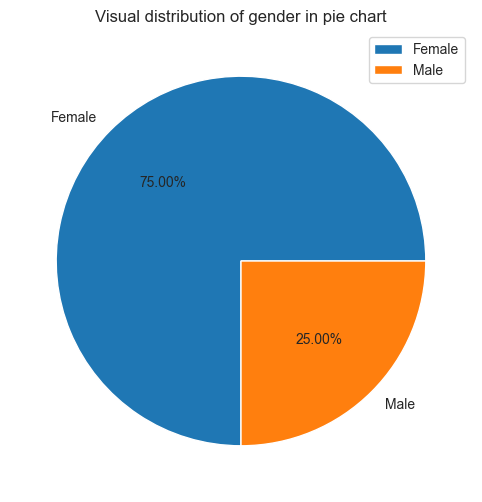

Number of male and female: 
 gender
Female    75
Male      25
Name: gender, dtype: int64


In [20]:
plt.figure(figsize=(12,6))
plt.title("Visual distribution of gender in pie chart")
g = plt.pie(df3['gender'].value_counts(),autopct='%1.2f%%', labels=df3['gender'].value_counts().index);
plt.legend()
plt.show()
print('Number of male and female: \n',df3.groupby('gender')['gender'].agg('count').sort_values(ascending=False))

Text(0.5, 1.0, 'Distribuition of panic attack among students agewise')

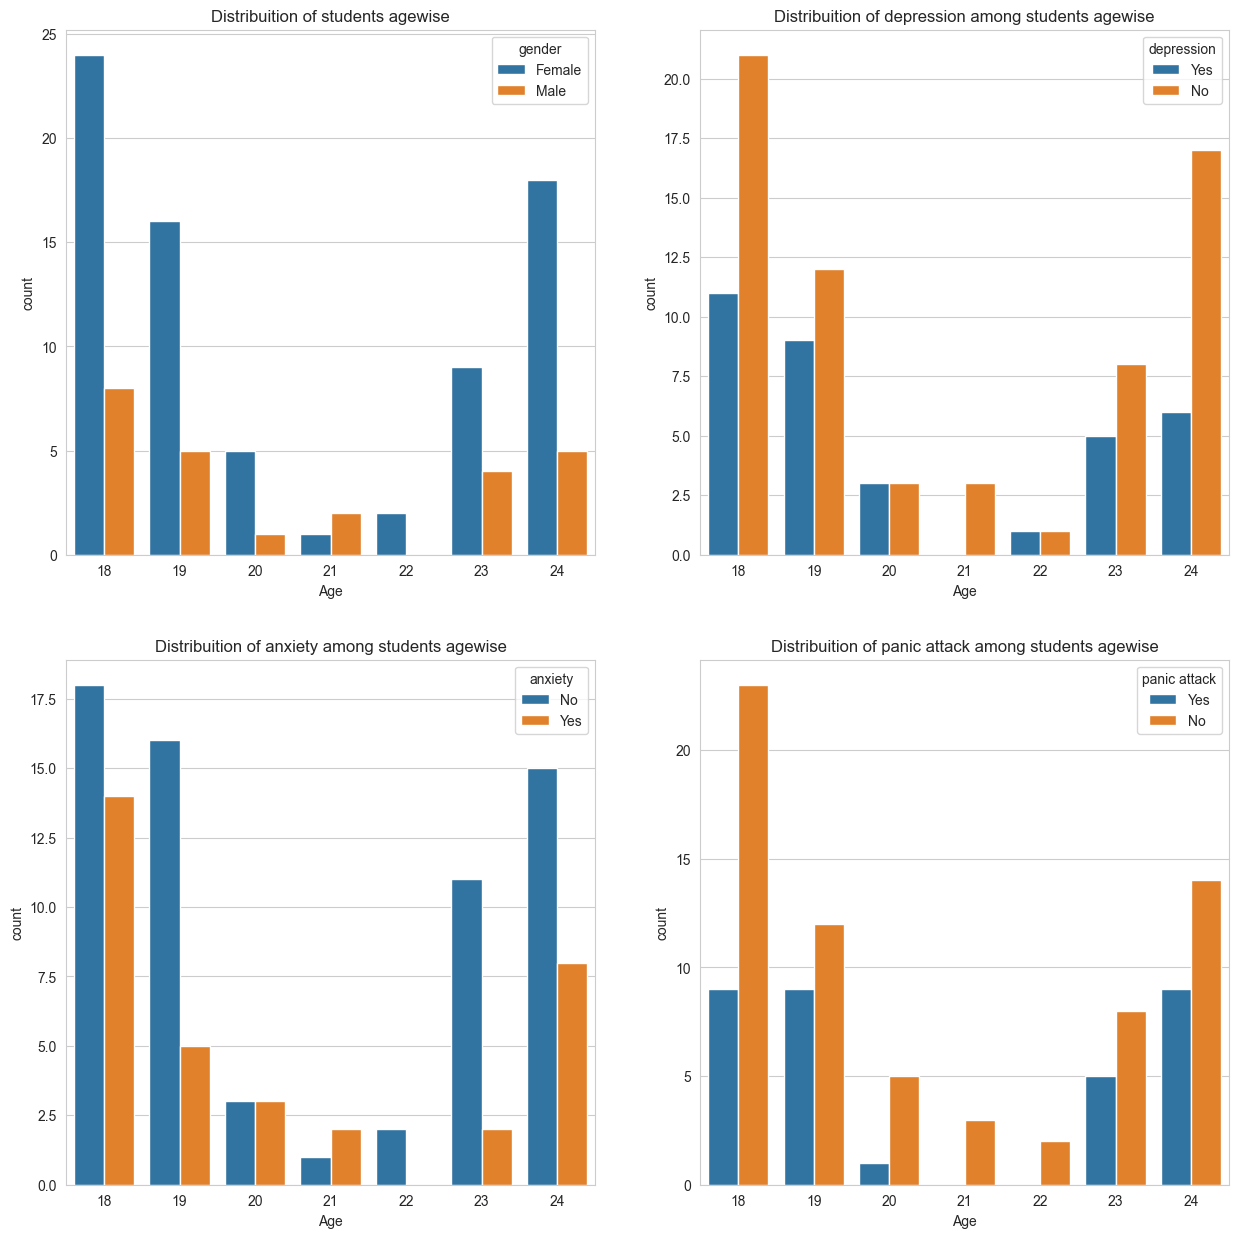

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.countplot(data = df3,x='Age',hue='gender', ax=axes[0][0])
axes[0][0].set_title('Distribuition of students agewise')
sns.countplot(data=df3,x='Age',hue='depression', ax=axes[0][1])
axes[0][1].set_title('Distribuition of depression among students agewise')
sns.countplot(data=df3,x='Age',hue='anxiety', ax=axes[1][0])
axes[1][0].set_title('Distribuition of anxiety among students agewise')
sns.countplot(data=df3,x='Age',hue='panic attack', ax=axes[1][1])
axes[1][1].set_title('Distribuition of panic attack among students agewise')

Text(0.5, 1.0, 'Distribuition of panic attack among students genderwise')

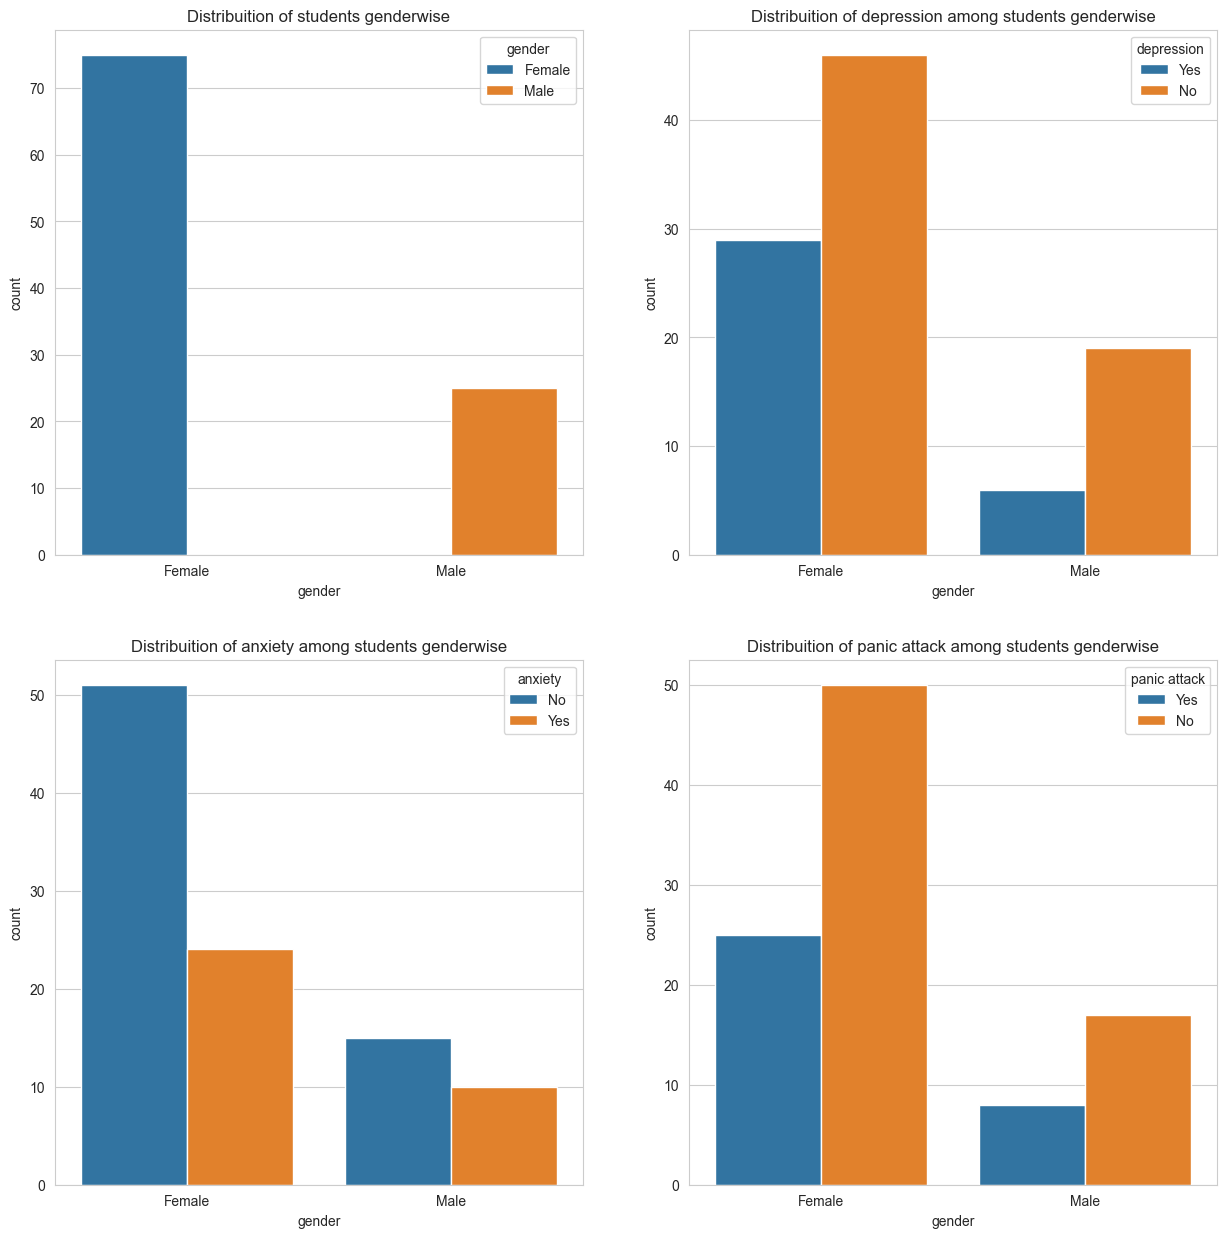

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.countplot(data = df3,x='gender',hue='gender', ax=axes[0][0])
axes[0][0].set_title('Distribuition of students genderwise')
sns.countplot(data=df3,x='gender',hue='depression', ax=axes[0][1])
axes[0][1].set_title('Distribuition of depression among students genderwise')
sns.countplot(data=df3,x='gender',hue='anxiety', ax=axes[1][0])
axes[1][0].set_title('Distribuition of anxiety among students genderwise')
sns.countplot(data=df3,x='gender',hue='panic attack', ax=axes[1][1])
axes[1][1].set_title('Distribuition of panic attack among students genderwise')

From these graphs we can observe that - 
- more than half the students having CGPA of 3.00-3.49 have depression.
- maximum students facing anxiety have a CGPA of 3.50-4.00, followed by 3.00-3.49, and 2.50-2.99
- more than half of the students having CGPA of 3.50-4.00 have panic attacks.

We can conclude that, students with higher CGPA experience depression,anxiety, and panic attacks more compared to those with lesser CGPA.

In [23]:
depression_stats = df3.groupby('depression')['depression'].agg('count').sort_values(ascending=False)
anxiety_stats = df3.groupby('anxiety')['anxiety'].agg('count').sort_values(ascending=False)
panic_att_stats = df3.groupby('panic attack')['panic attack'].agg('count').sort_values(ascending=False)
treatment_stats = df3.groupby('specialist treatment')['specialist treatment'].agg('count').sort_values(ascending=False)
print(depression_stats,'\n\n',anxiety_stats,'\n\n',panic_att_stats,'\n\n',treatment_stats)

depression
No     65
Yes    35
Name: depression, dtype: int64 

 anxiety
No     66
Yes    34
Name: anxiety, dtype: int64 

 panic attack
No     67
Yes    33
Name: panic attack, dtype: int64 

 specialist treatment
No     94
Yes     6
Name: specialist treatment, dtype: int64


In [27]:
output = df1[(df1["depression"]=='Yes') & (df1["anxiety"]=='Yes') & (df1["panic attack"]=='Yes')].reset_index(drop=True)
output.drop(output.columns[[0, 6,]], axis = 1, inplace = True)
print("Students Most Depressed, Anxiety, and Panic Attacks\n")
output

Students Most Depressed, Anxiety, and Panic Attacks



,gender,Age,course,Year,CGPA,depression,anxiety,panic attack,specialist treatment
0,Male,19.0,BIT,Year 1,3.00 - 3.49,Yes,Yes,Yes,No
1,Female,24.0,ENM,year 4,3.00 - 3.49,Yes,Yes,Yes,No
2,Female,18.0,Marine science,year 2,3.50 - 4.00,Yes,Yes,Yes,No
3,Female,23.0,BCS,Year 3,3.50 - 4.00,Yes,Yes,Yes,No
4,Female,24.0,BIT,Year 3,3.50 - 4.00,Yes,Yes,Yes,Yes
5,Female,19.0,BIT,year 1,3.00 - 3.49,Yes,Yes,Yes,No
6,Female,19.0,BIT,year 1,2.50 - 2.99,Yes,Yes,Yes,No
7,Female,20.0,koe,year 3,3.00 - 3.49,Yes,Yes,Yes,No
8,Female,24.0,Communication,Year 2,3.50 - 4.00,Yes,Yes,Yes,No
9,Female,18.0,psychology,year 1,3.50 - 4.00,Yes,Yes,Yes,No
